## Auto Encoder - Image colorization

AutoEncoder :

Encoder - It has conv layer + ReLU that convert orginal colorized imageto grey-scale image.

Decoder - takes Encoded grey-scale image & converts back to colorized image.

We can use only the ecoder part later to convert any grey-scale image to colorized image.

image : **(batch_size, channels, height, width)** :

    here torch.Size([64, 1, 32, 32])

each data of dataloader : **(batch_size_labels, (batch_size, channels, height, width))** :

    here torch.Size([64]),torch.Size([64, 1, 32, 32])

  - here batch_size_labels are the labels of all the images of length batch_size present inside image


100%|██████████| 170498071/170498071 [00:03<00:00, 56441299.06it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/10], Loss: 0.0012
Epoch [2/10], Loss: 0.0005
Epoch [3/10], Loss: 0.0004
Epoch [4/10], Loss: 0.0004
Epoch [5/10], Loss: 0.0003
Epoch [6/10], Loss: 0.0003
Epoch [7/10], Loss: 0.0003
Epoch [8/10], Loss: 0.0002
Epoch [9/10], Loss: 0.0002
Epoch [10/10], Loss: 0.0001
Files already downloaded and verified


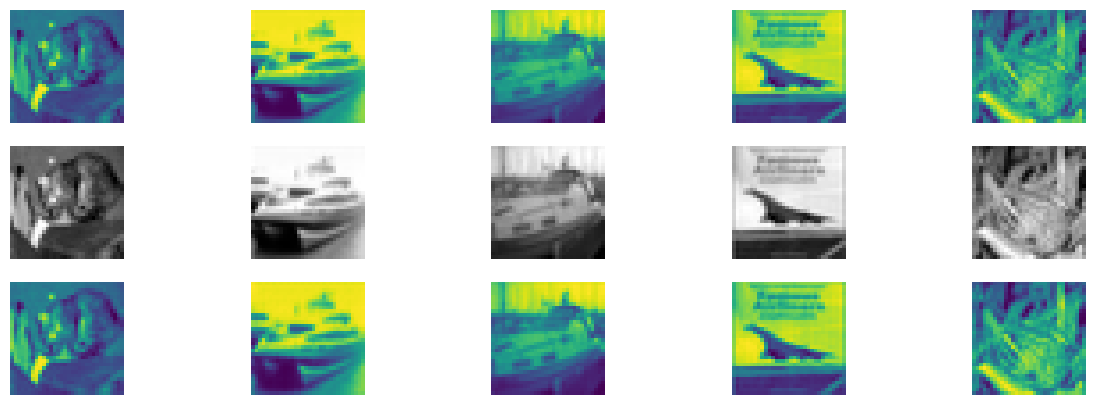

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define a simple colorization autoencoder model
class ColorizationAutoencoder(nn.Module):
    def __init__(self):
        super(ColorizationAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the model, optimizer, and loss function
model = ColorizationAutoencoder()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training the colorization autoencoder
num_epochs = 10

for epoch in range(num_epochs):
    for data in train_loader:
        images, _ = data
        grayscale_images = images[:, 0:1, :, :]  # Take only one channel (grayscale)

        optimizer.zero_grad()
        outputs = model(grayscale_images)
        loss = criterion(outputs, grayscale_images)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the colorization autoencoder
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=5, shuffle=False)

# Plot original, grayscale, and colorized images
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, _ = data
        grayscale_images = images[:, 0:1, :, :]  # Take only one channel (grayscale)
        colorized_images = model(grayscale_images)

        plt.figure(figsize=(15, 5))

        for i in range(5):
            # Original image
            plt.subplot(3, 5, i + 1)
            plt.imshow(np.transpose(images[i], (1, 2, 0)))
            plt.axis('off')

            # Grayscale image
            plt.subplot(3, 5, i + 6)
            plt.imshow(np.squeeze(grayscale_images[i]), cmap='gray')
            plt.axis('off')

            # Colorized image
            plt.subplot(3, 5, i + 11)
            plt.imshow(np.transpose(colorized_images[i], (1, 2, 0)))
            plt.axis('off')

        plt.show()
        break  # Display one batch for brevity

##  Denoising  AutoEncoder - Image

Workings
-------------------------------------

In a denoising autoencoder, the denoising process primarily occurs in the encoder part of the autoencoder. The encoder is responsible for capturing the essential features of the input data while filtering out noise. By training the autoencoder on noisy data and reconstructing the original, noise-free input, the model learns to denoise the input during the training process.

The decoder part of the autoencoder is responsible for reconstructing the denoised image from the encoded representation. It takes the encoded, noise-filtered representation and reconstructs an image that is as close as possible to the original, noise-free input

    input images : (batch_size, 1, 28, 28)
    Flattened : (batch_size, 784)
    Encoded output:(batch_size, 64)
    Decoder input : (64, 128)
    Reconstructs original input : (128, 784)
    Sigmoid():Final activation, constraining output between 0 and 1 (common for pixel values)
    Reshaped : (batch_size, 1, 28, 28)

model.eval() - disable dropout and batch normalization layers

model training - reduce MSE loss between the denoised images outputed by the model and the original images.

100%|██████████| 9912422/9912422 [00:00<00:00, 104116536.51it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28876208.30it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28902922.92it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12802774.71it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.0595
Epoch [2/10], Loss: 0.0527
Epoch [3/10], Loss: 0.0516
Epoch [4/10], Loss: 0.0513
Epoch [5/10], Loss: 0.0506
Epoch [6/10], Loss: 0.0492
Epoch [7/10], Loss: 0.0486
Epoch [8/10], Loss: 0.0489
Epoch [9/10], Loss: 0.0474
Epoch [10/10], Loss: 0.0493


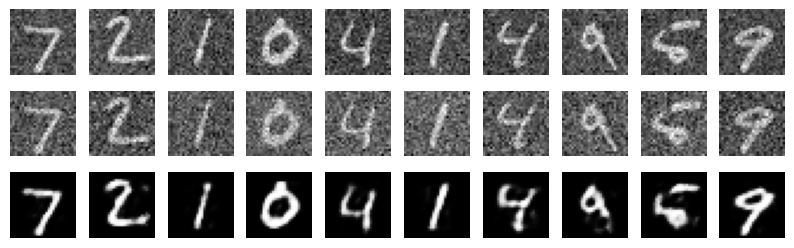

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define a simple denoising autoencoder model
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(in_features=28 * 28, out_features=128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(x.size(0), 1, 28, 28)  # Reshape to image size

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + 0.2 * torch.randn_like(x))  # Add noise to the images
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the model, optimizer, and loss function
model = DenoisingAutoencoder()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training the denoising autoencoder
num_epochs = 10

for epoch in range(num_epochs):
    for data in train_loader:
        images, _ = data
        noisy_images = images + 0.2 * torch.randn_like(images)  # Add noise to the images

        optimizer.zero_grad()
        outputs = model(noisy_images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the denoising autoencoder
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Plot original, noisy, and denoised images
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, _ = data
        noisy_images = images + 0.2 * torch.randn_like(images)
        denoised_images = model(noisy_images)

        plt.figure(figsize=(10, 3))

        for i in range(10):
            # Original image
            plt.subplot(3, 10, i + 1)
            plt.imshow(np.squeeze(images[i]), cmap='gray')
            plt.axis('off')

            # Noisy image
            plt.subplot(3, 10, i + 11)
            plt.imshow(np.squeeze(noisy_images[i]), cmap='gray')
            plt.axis('off')

            # Denoised image
            plt.subplot(3, 10, i + 21)
            plt.imshow(np.squeeze(denoised_images[i]), cmap='gray')
            plt.axis('off')

        plt.show()
        break  # Display one batch for brevity


In [ ]:
for data in train_loader:
  print(data[0].shape)
  print(data[1].shape)
  print(len(data),len(train_loader))
  break

torch.Size([64, 1, 28, 28])
torch.Size([64])
2 938


## Denoising  AutoEncoder - Time Series

here length of series : 1047

noisy_data : (1047,)

noisy_data_tensor : torch.Size([1, 1047])

Not good if noise_factor > 3



[*********************100%%**********************]  1 of 1 completed


Epoch [10/200], Loss: 14650.8115234375
Epoch [20/200], Loss: 1699.037841796875
Epoch [30/200], Loss: 805.7572021484375
Epoch [40/200], Loss: 164.13259887695312
Epoch [50/200], Loss: 98.24470520019531
Epoch [60/200], Loss: 30.54694938659668
Epoch [70/200], Loss: 6.779566287994385
Epoch [80/200], Loss: 3.551515817642212
Epoch [90/200], Loss: 1.7263524532318115
Epoch [100/200], Loss: 0.6756828427314758
Epoch [110/200], Loss: 0.229744091629982
Epoch [120/200], Loss: 0.08156251907348633
Epoch [130/200], Loss: 0.03029506281018257
Epoch [140/200], Loss: 0.01042919047176838
Epoch [150/200], Loss: 0.003394282888621092
Epoch [160/200], Loss: 0.0007967941928654909
Epoch [170/200], Loss: 0.00021576244034804404
Epoch [180/200], Loss: 0.00012547927326522768
Epoch [190/200], Loss: 5.9540921938605607e-05
Epoch [200/200], Loss: 1.1980172530456912e-05


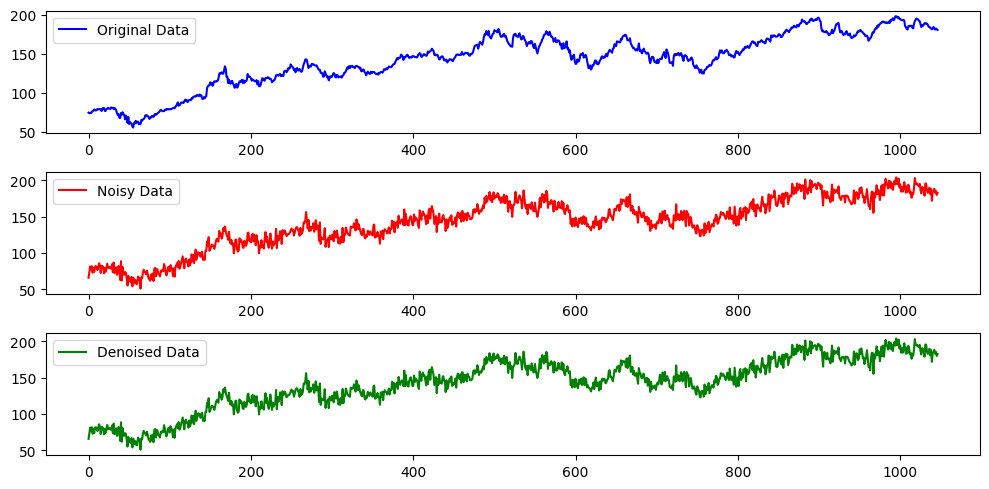

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download stock data
stock_data = yf.download('AAPL', start='2020-01-01', end='2024-03-01')
price_data = stock_data['Close'].values.astype(float)

# Add noise to the data
noise_factor = 5.7
noisy_data = price_data + noise_factor * np.random.randn(len(price_data))
noisy_data_tensor = torch.tensor(noisy_data, dtype=torch.float32).unsqueeze(0)

# Define the denoising autoencoder model
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(in_features=len(price_data), out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(in_features=16, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=len(price_data))
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the model, loss function, and optimizer
model = DenoisingAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 200
for epoch in range(num_epochs):
    # Forward pass
    output = model(noisy_data_tensor)
    loss = criterion(output, noisy_data_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Reconstruct the denoised data
reconstructed_data = model(noisy_data_tensor).detach().numpy().flatten()

# Plot original, noisy, and denoised data
fig, axs = plt.subplots(3, 1, figsize=(10,5))

axs[0].plot(price_data, label='Original Data', color='blue')
axs[0].legend()

axs[1].plot(noisy_data, label='Noisy Data', color='red')
axs[1].legend()

axs[2].plot(reconstructed_data.flatten(), label='Denoised Data', color='green')
axs[2].legend()

plt.tight_layout()
plt.show()


## RBM - Dimentionality Reduction

RBM here is to perform an initial, non-linear dimensionality reduction by learning a probability distribution over its set of inputs, which may capture complex patterns in the data

PCA is then used to perform a linear dimensionality reduction on the output of the RBM((principal components) in which the variance of the data is maximized), further reducing the dimensionality of the data for visualization and analysis.

**Here's a more detailed explanation of how RBMs work:**

**Probability Distribution**: RBMs consist of visible units (input data) and hidden units (latent variables). The model learns the joint probability distribution over both visible and hidden units. This distribution captures the relationships and patterns present in the data.

**Learning Hidden Patterns**: RBMs are generative models, meaning they can generate new data samples that are similar to the training data. During training, the RBM learns to capture the underlying patterns and features present in the data by adjusting the weights connecting the visible and hidden units.

**Finding Hidden Patterns**: The RBM learns to find hidden patterns by updating its weights using a process called Gibbs sampling. This process involves iteratively sampling the hidden units given the visible units and then sampling the visible units given the hidden units. By repeating this process, the RBM learns to represent the data in terms of these hidden patterns.

**Explaining Observed Data**: The RBM's goal is to explain the observed data through these hidden patterns. By learning the probability distribution over the inputs, the RBM can generate new data samples that resemble the training data and capture the underlying structure of the data.

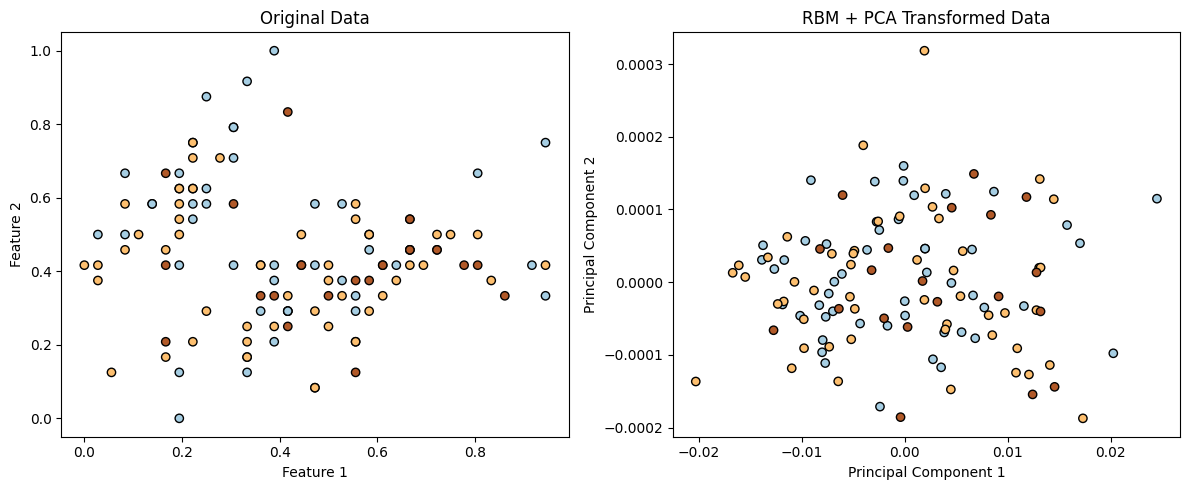

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Set up RBM and PCA for dimensionality reduction
rbm = BernoulliRBM(n_components=2, learning_rate=0.01, n_iter=20, random_state=42)
pca = PCA(n_components=2)

# Create a pipeline for RBM and PCA
rbm_pca = Pipeline(steps=[('rbm', rbm), ('pca', pca)])

# Fit and transform the data using the pipeline
X_rbm_pca = rbm_pca.fit_transform(X_train)

# Plot the reduced-dimensional data
plt.figure(figsize=(12, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y[:X_rbm_pca.shape[0]], edgecolor='k', cmap=plt.cm.Paired)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot RBM + PCA transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_rbm_pca[:, 0], X_rbm_pca[:, 1], c=y[:X_rbm_pca.shape[0]], edgecolor='k', cmap=plt.cm.Paired)
plt.title('RBM + PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

## RBM - Sentence Embedding

    Sentence : "This is an example sentence."
    Vectorized sentence (to array) : [1 0 0 0 0 1 0 0 1 0 0 1 1 0 0]
    RBM features text (X_features) : [0.3794486 ... ],length = 50

    for Glove
    tokenized sentence[0] : words = ['This', 'is', 'an', 'example', 'sentence.']
    word_vectors : Word: This, Vector: [-0.0173568 ...],length = 50
    sentence_embeddings : [0 ... ],length = 50
    get_sentence_embedding : calculates the average of the word vectors in a sentence to create a sentence embedding. If a word is not in the Word2Vec model's vocabulary, it skips that word

**Input Representation**: Each sentence is represented as a binary feature vector, where each element corresponds to a word or phrase in the vocabulary. If a word or phrase is present in the sentence, its corresponding element in the feature vector is set to 1; otherwise, it is set to 0.

**RBM Training**: The RBM is trained on these binary feature vectors to learn a set of hidden features that capture the underlying patterns in the data. The RBM learns to model the joint probability distribution of the visible and hidden units in a way that minimizes the reconstruction error of the input data.

**Feature Learning**: After training, the RBM's hidden units contain learned features that represent higher-level abstractions of the input data. These features can be seen as the "essence" of the input sentences, capturing important patterns and relationships among words and phrases.

Sentence: This is an example sentence.
Sentence Embedding: [0.14387555 0.13896168 0.14108168 0.14032032 0.14371211 0.14197305
 0.1439838  0.13824397 0.14013868 0.14132689 0.14227648 0.14101694
 0.13939753 0.14170448 0.1393694  0.14394006 0.1415707  0.14131081
 0.14071582 0.1427293  0.14354217 0.14166471 0.13953961 0.13998876
 0.14225161 0.14171978 0.14340232 0.14142165 0.14004886 0.14259116
 0.14193181 0.14022167 0.14192015 0.14016534 0.13958556 0.14081038
 0.14158213 0.140644   0.14376059 0.13987703 0.14146449 0.14265726
 0.14472763 0.1419997  0.13933081 0.14004201 0.14058737 0.14353968
 0.14056004 0.14143729]


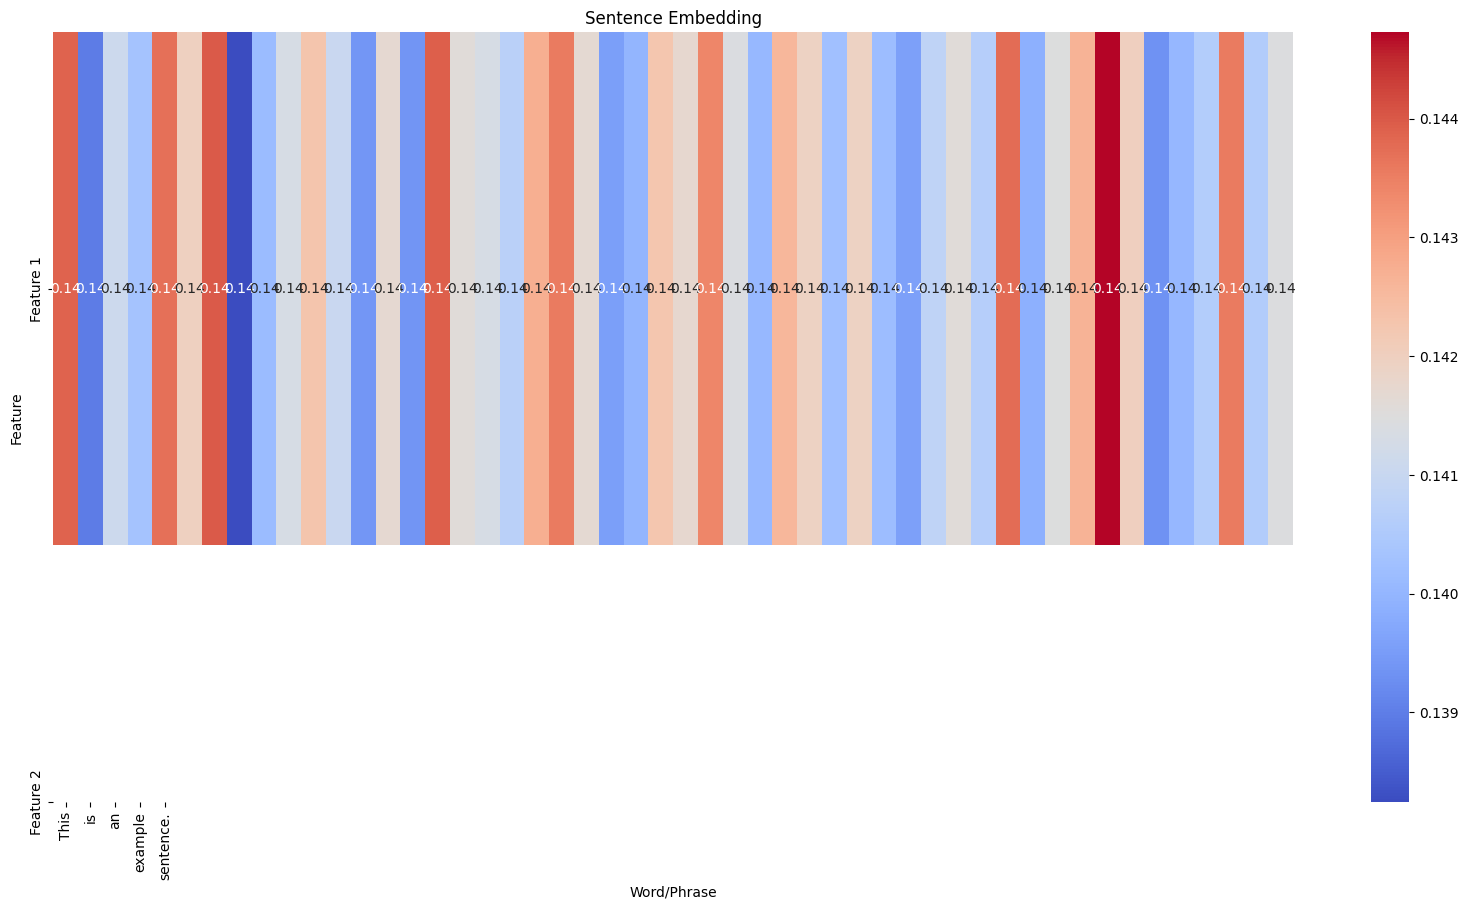

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Sample text data
sentences = [
    "This is an example sentence.",
    "Sentence embeddings are useful.",
    "RBM can be used for feature learning."
]

# Convert text data to binary feature vectors using CountVectorizer
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(sentences).toarray()


# Build an RBM for feature learning
rbm = BernoulliRBM(n_components=50, learning_rate=0.01, n_iter=20)
X_features = rbm.fit_transform(X)
# Normalize the RBM features to get sentence embeddings
sentence_embeddings = normalize(X_features, norm='l2')


# Display the sentence embeddings
for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}")
    print(f"Sentence Embedding: {sentence_embeddings[i]}")
    break


def plot_sentence_embeddings(sentence_embeddings, sentence):
    plt.figure(figsize=(20,10))
    sns.heatmap(sentence_embeddings.reshape(1, -1), annot=True, fmt=".2f", cmap="coolwarm",
                xticklabels=sentence.split(), yticklabels=['Feature 1', 'Feature 2'])
    plt.title("Sentence Embedding")
    plt.xlabel("Word/Phrase")
    plt.ylabel("Feature")
    plt.show()

# Plot the sentence embeddings for the first sentence
plot_sentence_embeddings(sentence_embeddings[0], sentences[0])


In [ ]:

import numpy as np
from gensim.models import Word2Vec
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import normalize

# Sample text data
sentences = [
    "This is an example sentence.",
    "Sentence embeddings are useful.",
    "RBM can be used for feature learning."
]

# Load pre-trained Word2Vec embeddings (you can replace this with GloVe if needed)
word2vec_model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)


# Function to get sentence embeddings using Word2Vec
def get_sentence_embedding(sentence, model):
    words = sentence.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Get Word2Vec embeddings for each sentence
sentence_embeddings = [get_sentence_embedding(sentence, word2vec_model) for sentence in sentences]

"""
# Load pre-trained GloVe embeddings using spaCy
nlp = spacy.load("en_core_web_md")

# Function to get sentence embeddings using GloVe
def get_sentence_embedding(sentence, nlp):
    doc = nlp(sentence)
    vectors = [token.vector for token in doc]
    if not vectors:
        return np.zeros(nlp.vocab.vectors.shape[1])
    return np.mean(vectors, axis=0)


"""
# Normalize the embeddings
sentence_embeddings = normalize(sentence_embeddings, norm='l2')

# Build an RBM for further feature learning (similar to the previous example)
rbm = BernoulliRBM(n_components=50, learning_rate=0.01, n_iter=20)
X_features = rbm.fit_transform(sentence_embeddings)

# Display the sentence embeddings
for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}")
    print(f"Sentence Embedding: {X_features[i]}")
    break

Sentence: This is an example sentence.
Sentence Embedding: [0.46739565 0.46771841 0.46679331 0.46714832 0.46722397 0.46723594
 0.46772524 0.46733329 0.46761392 0.46729103 0.46699865 0.46724009
 0.46743357 0.46712266 0.4682014  0.46668449 0.4677086  0.46740375
 0.46719386 0.46627254 0.46671407 0.46663904 0.46800927 0.46753018
 0.46834148 0.46782354 0.46708473 0.4673759  0.46705028 0.46668557
 0.46717357 0.46730374 0.46828716 0.4676139  0.46721444 0.46734265
 0.46788129 0.46740206 0.46645519 0.46668188 0.4675839  0.46714343
 0.46675873 0.46699704 0.46689543 0.467234   0.46674193 0.46687213
 0.46809791 0.46695016]


In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Sample text data
sentences = [
    "This is an example sentence.",
    "Sentence embeddings are useful.",
    "RBM can be used for feature learning."
]

# Tokenize the sentences into words
tokenized_sentences = [sentence.split() for sentence in sentences]
print(tokenized_sentences)
# Load pre-trained Word2Vec embeddings
word2vec_model = Word2Vec(tokenized_sentences, vector_size=50, window=5, min_count=1, workers=4)

# Get the word vectors for each word in the first sentence
words = tokenized_sentences[0]
word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]

# Print the word vectors
for word, vector in zip(words, word_vectors):
    print(f"Word: {word}, Vector: {vector}")


[['This', 'is', 'an', 'example', 'sentence.'], ['Sentence', 'embeddings', 'are', 'useful.'], ['RBM', 'can', 'be', 'used', 'for', 'feature', 'learning.']]
Word: This, Vector: [-0.0173568  -0.00289396  0.01895893 -0.01509898 -0.0107162   0.01863313
 -0.01794745  0.00765182  0.00133088  0.0133214   0.01662551 -0.00570157
 -0.00798463  0.01779583  0.00417929  0.01249788 -0.01889143  0.01918025
 -0.00269662 -0.01210423  0.00598507 -0.00091322  0.00941299 -0.00456604
 -0.00827568  0.0045558   0.01670877 -0.00999121  0.00533736 -0.01598111
 -0.01354669 -0.00093534 -0.01753546  0.00557888  0.00319719 -0.00463938
  0.01000758  0.01949757  0.01690854 -0.00376045  0.0041163  -0.00800738
 -0.01648281  0.01255591 -0.00389836 -0.00133241 -0.00354266 -0.00907133
  0.00812342 -0.00854036]
Word: is, Vector: [ 1.63362399e-02 -8.88606533e-03  1.79708675e-02  1.65073294e-02
 -8.87044426e-03  6.06210204e-04  8.54898244e-03 -7.85264000e-03
 -1.11199310e-02 -1.30246449e-02 -1.34147645e-03 -5.91843156e-04
  8

### RBM - Image Reconstruction

    self.W : (visible, hidden)
    self._visible_bias : (visible,)
    self._hidden_bias : (hidden,)
    X : (batch_size, visible)
    self.V : (batch_size, visible)

    Image loading : reshaped from (28, 28) --> flat vector (784,)
    Fit method : (batch_size, 784) --> (batch_size, hidden)
    Reconstruction : (batch_size, 784)

**Training**: During training, the RBM learns the weights that best represent the input data (in this case, images).
It tries to minimize the difference between the input images and their reconstructions.

**Encoding**:To reconstruct an image, the RBM first encodes it into a set of hidden units.
Each hidden unit represents a feature or pattern that the RBM has learned from the training data.

**Decoding**:After encoding the image, the RBM decodes it back into the original image space.
This is done by reconstructing the visible units (pixels) using the learned weights and biases.

**Reconstruction**: The reconstructed image is compared to the original input image to measure the reconstruction error.
The goal is to minimize this error during training.

**Visualization**: After training, the RBM can be used to reconstruct images.By inputting an image into the RBM and running it through the decoding process, we can generate a reconstruction of the input image.

**Evaluation**:The quality of the reconstruction can be evaluated visually or quantitatively using metrics such as Mean Squared Error (MSE) or Structural Similarity Index (SSI).

Overall, RBM learns a probabilistic model of the input data and uses this model to reconstruct images by sampling from the learned distribution.

100%|██████████| 9912422/9912422 [00:00<00:00, 106020459.74it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 56289820.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23775999.47it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9530029.40it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

training epoch 1 loss 0.7223373651504517
training epoch 2 loss 0.7186346054077148
training epoch 3 loss 0.7148922681808472


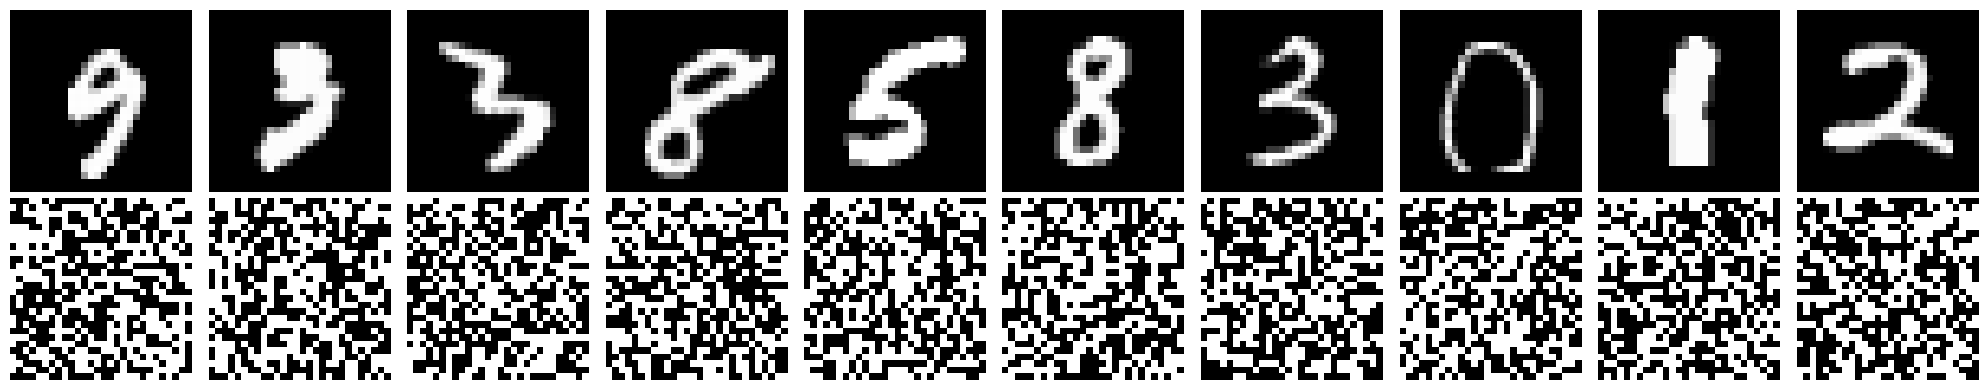

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt

class RBM(nn.Module):
    def __init__(self, visible, hidden):
        super(RBM, self).__init__()
        self._visible = visible
        self._hidden = hidden

        # Weights and biases
        self._W = nn.Parameter(torch.randn(self._visible, self._hidden) * 0.1)
        self._hidden_bias = nn.Parameter(torch.zeros(self._hidden))
        self._visible_bias = nn.Parameter(torch.zeros(self._visible))

    def forward(self, X):
        _h = torch.sigmoid(torch.matmul(X, self._W) + self._hidden_bias)
        self.h = torch.relu(torch.sign(_h - torch.rand_like(_h)))
        _v = torch.sigmoid(torch.matmul(self.h, self._W.t()) + self._visible_bias)
        self.V = torch.relu(torch.sign(_v - torch.rand_like(_v)))
        return self.V

    def free_energy(self, V):
        b = self._visible_bias.view(-1, 1)
        term_1 = -torch.matmul(V, b).view(-1)
        term_2 = -torch.sum(nn.functional.softplus(torch.matmul(V, self._W) + self._hidden_bias))
        return term_1 + term_2

    def one_pass(self, X):
        h = torch.sigmoid(torch.matmul(X, self._W) + self._hidden_bias)
        return torch.matmul(h, self._W.t()) + self._visible_bias

    def fit(self, X, epochs=1, batch_size=100):
        optimizer = optim.SGD(self.parameters(), lr=1e-3)
        dataset = TensorDataset(torch.tensor(X))
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        criterion = nn.BCEWithLogitsLoss()
        for epoch in range(epochs):
            for batch in dataloader:
                optimizer.zero_grad()
                reconstructed_input = self.one_pass(batch[0])
                loss = criterion(reconstructed_input, batch[0])
                loss.backward()
                optimizer.step()
            print('training epoch {0} loss {1}'.format(epoch + 1, loss.item()))

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)

# Get training data
for data, _ in train_loader:
    X_train = data.numpy()

X_train = X_train.astype('float32')
_, m = X_train.shape

# Initialize RBM and train
rbm = RBM(m, 100)
rbm.fit(X_train, epochs=3)

# Reconstructing images
num_samples = 10
sample_indices = np.random.randint(0, len(X_train), num_samples)
sample_images = torch.tensor(X_train[sample_indices])

reconstructed_images = rbm.forward(sample_images)

# Plotting original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(num_samples):
    # Original images
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(sample_images[i].view(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(reconstructed_images[i].view(28, 28).detach().numpy(), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Variational Auto Encoder - Image generation

**Encoder**: The encoder takes an input image (flattened to a vector of size 784) and passes it through a fully connected layer (Linear) with ReLU activation, reducing the dimensionality to hidden_dim. Then, another fully connected layer outputs the parameters for the latent distribution: mean (mu) and log variance (log_var), each of size latent_dim.

**Reparameterization**: The reparameterize function samples a latent vector z from the learned distribution parameters (mu and log_var) using the reparameterization trick.

**Decoder**: The decoder takes the latent vector z and passes it through a fully connected layer with ReLU activation, increasing the dimensionality back to hidden_dim. Then, another fully connected layer with Sigmoid activation reconstructs the output image, which is of size 784 (same as the input image).


**Loss Function: Reconstruction Loss + KL Divergence**

**Reconstruction Loss**: Measures the difference between the input and reconstructed images using binary cross-entropy loss (BCELoss).

**KL Divergence**: Regularizes the latent space distribution to be close to a standard normal distribution.


Throughout the model, the shape of the tensor changes as it moves from layers to layers and whenever it is reshaped explicitly:

    Encoder : Input image (784) -> Hidden layer (256) -> Latent distribution parameters (20*2).
    Decoder : Latent vector z (20) -> Hidden layer (256) -> Reconstructed image (784).

These transformations ensure that the model learns a meaningful latent representation of the input images, allowing it to reconstruct and generate new images.

100%|██████████| 9912422/9912422 [00:00<00:00, 101470253.18it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 60236545.91it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29727229.89it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1271815.79it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss: 174.47093235677085
Epoch 2, Loss: 126.87785387369792
Epoch 3, Loss: 118.46349152018229
Epoch 4, Loss: 114.38986715494792
Epoch 5, Loss: 112.11271827799479
Epoch 6, Loss: 110.62842194010416
Epoch 7, Loss: 109.56212086588542
Epoch 8, Loss: 108.77446136067708
Epoch 9, Loss: 108.20401707356771
Epoch 10, Loss: 107.66455522460937


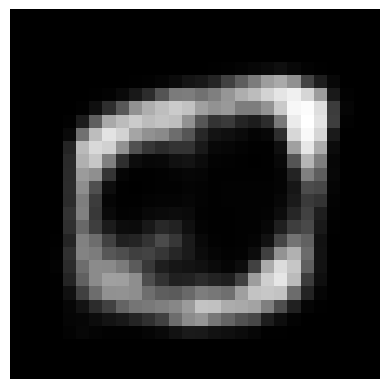

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)  # Two outputs for mean and variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = x.view(-1, 784)
        latent_params = self.encoder(x)
        mu, log_var = latent_params[:, :latent_dim], latent_params[:, latent_dim:]
        z = self.reparameterize(mu, log_var)
        reconstructed_x = self.decoder(z)
        return reconstructed_x, mu, log_var

# Define hyperparameters
input_dim = 784  # MNIST image size (28x28)
hidden_dim = 256
latent_dim = 20
batch_size = 128
epochs = 10
learning_rate = 1e-3

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the VAE model
vae = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)

# Define the loss function (reconstruction loss + KL divergence)
def loss_function(reconstructed_x, x, mu, log_var):
    reconstruction_loss = nn.BCELoss(reduction='sum')(reconstructed_x, x.view(-1, 784))
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss + kl_divergence

# Training loop
vae.train()
for epoch in range(epochs):
    total_loss = 0
    for batch_idx, (x, _) in enumerate(train_loader):
        optimizer.zero_grad()
        reconstructed_x, mu, log_var = vae(x)
        loss = loss_function(reconstructed_x, x, mu, log_var)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader.dataset)}")

# Generate a sample from the learned latent space
vae.eval()
with torch.no_grad():
    z = torch.randn(1, latent_dim)
    reconstructed_x = vae.decoder(z).view(28, 28).numpy()  # Assuming MNIST image size
    plt.imshow(reconstructed_x, cmap='gray')
    plt.axis('off')
    plt.show()
